In [28]:
import pandas as pd
import datetime
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('usage_pre_covid_nordic.csv')
df["event_date"] = pd.to_datetime(df["event_date"])
df

,event_date,country,age,top_device,gender,APP_APPLICATION_OPEN_UU,APP_APPLICATION_OPEN_COUNT,DIRECT_SNAP_CREATE_UU,DIRECT_SNAP_CREATE_COUNT,DIRECT_SNAP_SEND_UU,DIRECT_SNAP_SEND_COUNT,STORY_SNAP_POST_UU,STORY_SNAP_POST_COUNT
0,2019-01-01,NO,2018.0,iOS,female,3387,128750,2776,91632,2595,63520,511,1879
1,2019-01-01,SE,2018.0,iOS,male,1837,82842,1444,68770,1380,56490,178,398
2,2019-01-01,SE,2018.0,iOS,female,1455,59179,1212,44296,1113,31952,268,675
3,2019-01-01,DK,2018.0,iOS,male,2047,80637,1487,72156,1414,59560,124,268
4,2019-01-01,NO,2018.0,iOS,male,4479,201175,3559,148124,3416,118179,288,672
...,...,...,...,...,...,...,...,...,...,...,...,...,...
869936,2020-03-21,NO,32.0,Android,NaN,68,1230,35,349,25,108,8,24
869937,2020-03-21,SE,37.0,iOS,NaN,72,1252,36,919,25,410,9,24
869938,2020-03-21,DK,83.0,iOS,female,183,2558,29,2098,25,1210,4,16
869939,2020-03-21,NO,84.0,iOS,male,208,1982,34,267,25,232,3,5


In [5]:
#df['event_date'] = pd.to_datetime(df['event_date'])
#df_byday = df.groupby(df['event_date'].dt.date).agg({'APP_APPLICATION_OPEN_UU': 'sum'}).reset_index()
#df_byday = df_byday.rename(columns={'APP_APPLICATION_OPEN_UU': 'y', 'event_date': 'ds'})

### Denmark
Started lockdown on 3/13/2020

In [6]:
dk_df = df[df['country'] == 'DK']
dk_byday = dk_df.groupby(dk_df['event_date'].dt.date).agg({'APP_APPLICATION_OPEN_UU': 'sum'}).reset_index()
dk_byday = dk_byday.rename(columns={'APP_APPLICATION_OPEN_UU': 'y', 'event_date': 'ds'})
dk_covid = dk_byday[dk_byday["ds"] >= datetime.date(2020, 3, 13)]
m = Prophet()
m.fit(dk_covid)
future = m.make_future_dataframe(periods=10)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_dates = m.make_future_dataframe(periods=10)
dk_forecast = m.predict(future_dates)
dk_q1_pred = dk_forecast[dk_forecast["ds"] >= datetime.datetime.combine(datetime.date(2020, 3, 22), datetime.datetime.min.time())]
dk_q1_pred = dk_q1_pred.loc[:, ['ds', 'yhat']]
dk_q1_pred = dk_q1_pred.rename(columns={'yhat': 'y'})
dk_byday_wpred = pd.concat([dk_byday, dk_q1_pred], ignore_index=True)
dk_q1 = dk_byday_wpred[dk_byday_wpred["ds"] >= datetime.date(2020, 1, 1)]
dk_q1_avg = dk_q1['y'].mean()
dk_q1_avg

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 6.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgm38mns/sj582775.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgm38mns/162o4bif.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16882', 'data', 'file=/tmp/tmpbgm38mns/sj582775.json', 'init=/tmp/tmpbgm38mns/162o4bif.json', 'output', 'file=/tmp/tmpbgm38mns/prophet_modellitaublg/prophet_model-20230316164652.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:46:52 - cmdstanpy - INFO - Chain [1] start processing
INF

1750425.4344046903

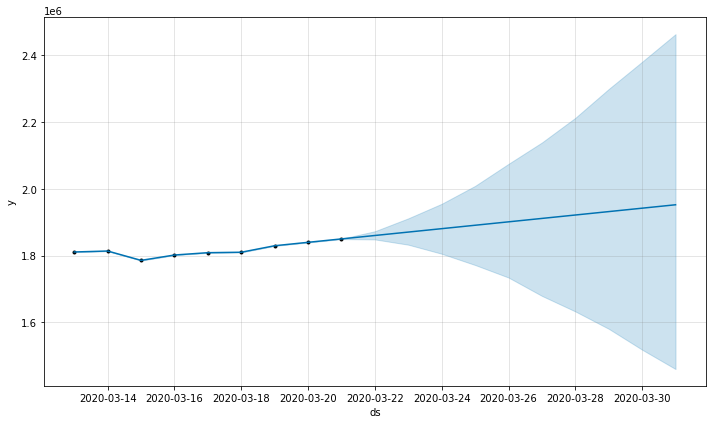

In [7]:
fig1 = m.plot(dk_forecast)

### Sweden
Never had a lockdown

In [8]:
se_df = df[df['country'] == 'SE']
se_byday = se_df.groupby(se_df['event_date'].dt.date).agg({'APP_APPLICATION_OPEN_UU': 'sum'}).reset_index()
se_byday = se_byday.rename(columns={'APP_APPLICATION_OPEN_UU': 'y', 'event_date': 'ds'})

m = Prophet()
m.fit(se_byday)
future = m.make_future_dataframe(periods=10)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_dates = m.make_future_dataframe(periods=10)
se_forecast = m.predict(future_dates)
########
se_q1_pred = se_forecast[se_forecast["ds"] >= datetime.datetime.combine(datetime.date(2020, 3, 22), datetime.datetime.min.time())]
se_q1_pred = se_q1_pred.loc[:, ['ds', 'yhat']]
se_q1_pred = se_q1_pred.rename(columns={'yhat': 'y'})
se_byday_wpred = pd.concat([se_byday, se_q1_pred], ignore_index=True)
se_q1 = se_byday_wpred[se_byday_wpred["ds"] >= datetime.date(2020, 1, 1)]
se_q1_avg = se_q1['y'].mean()
se_q1_avg

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgm38mns/w3eppamu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgm38mns/t3d81q27.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99868', 'data', 'file=/tmp/tmpbgm38mns/w3eppamu.json', 'init=/tmp/tmpbgm38mns/t3d81q27.json', 'output', 'file=/tmp/tmpbgm38mns/prophet_modelsaxoslrk/prophet_model-20230316164653.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:46:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:46:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.9/dist-packages/pa

2626430.1921764803

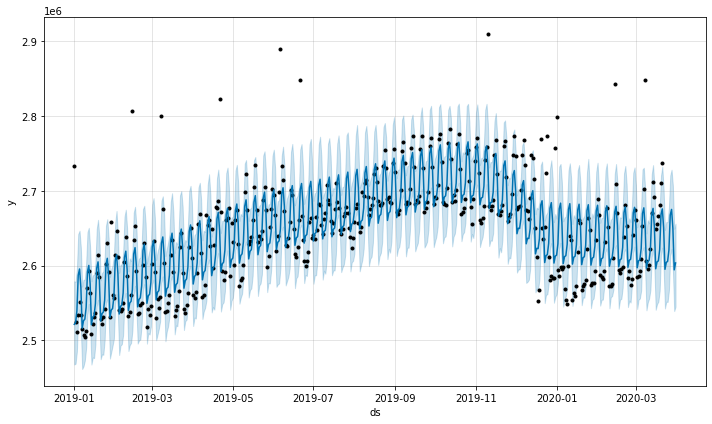

In [9]:
fig1 = m.plot(se_forecast)

### Norway
Started lockdown 3/12/2020

In [10]:
#Norway Lockdown started March 12th

no_df = df[df['country'] == 'NO']
no_byday = no_df.groupby(no_df['event_date'].dt.date).agg({'APP_APPLICATION_OPEN_UU': 'sum'}).reset_index()
no_byday = no_byday.rename(columns={'APP_APPLICATION_OPEN_UU': 'y', 'event_date': 'ds'})
no_covid = no_byday[no_byday["ds"] >= datetime.date(2020, 3, 12)]
m = Prophet()
m.fit(no_covid)
future = m.make_future_dataframe(periods=10)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_dates = m.make_future_dataframe(periods=10)
no_forecast = m.predict(future_dates)
no_q1_pred = no_forecast[no_forecast["ds"] >= datetime.datetime.combine(datetime.date(2020, 3, 22), datetime.datetime.min.time())]
no_q1_pred = no_q1_pred.loc[:, ['ds', 'yhat']]
no_q1_pred = no_q1_pred.rename(columns={'yhat': 'y'})
no_byday_wpred = pd.concat([no_byday, no_q1_pred], ignore_index=True)
no_q1 = no_byday_wpred[no_byday_wpred["ds"] >= datetime.date(2020, 1, 1)]
no_q1_avg = no_q1['y'].mean()
no_q1_avg

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgm38mns/a528oher.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgm38mns/3faua8wi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81267', 'data', 'file=/tmp/tmpbgm38mns/a528oher.json', 'init=/tmp/tmpbgm38mns/3faua8wi.json', 'output', 'file=/tmp/tmpbgm38mns/prophet_modelaqbpp5nl/prophet_model-20230316164655.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
16:46:55 - cmdstanpy - INFO - Chain [1] start processing
INF

2585314.9664938077

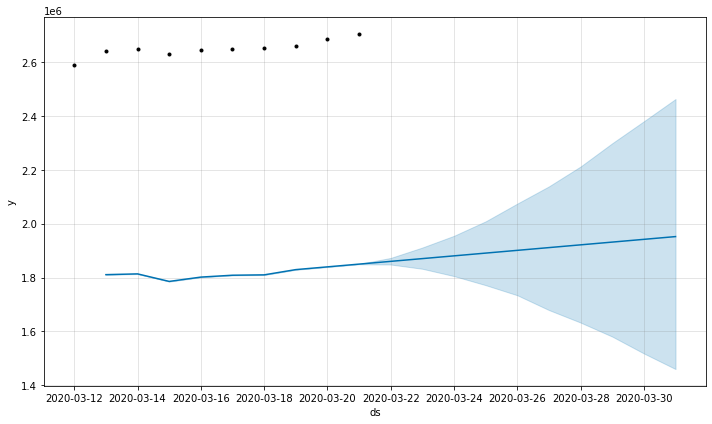

In [11]:
fig1 = m.plot(dk_forecast)

### Overal Q1 Average

In [12]:
dk_q1_avg + se_q1_avg + no_q1_avg

6962170.593074978

# Quarter 2 

### Denmark:
LOCKDOWN START: 13 MARCH\
LOCKDOWN END: On 6 April, Prime Minister Mette Frederiksen announced what she called the "first phase" of the reopening of Denmark:[52] she announced that nurseries and kindergartens would be opened again on 15 April and that folkeskole would be reopened for pupils in years 1–6 (Danish: 0.-5. klasse);[52] furthermore, the final exams for pupils in year 10 (Danish: 9. klasse), the last year of the folkeskole, were cancelled.[52] Restaurants, cafés and hairdressers were to remain closed until 10 May, and larger gatherings will be prohibited until September.[52]

In [13]:
#https://towardsdatascience.com/using-prophet-after-covid-read-this-first-fc27cd77f3d7

DE_COVID_lockdown = pd.DataFrame({
        'holiday': 'covid',
        'ds':  pd.date_range(start='2020-03-13', 
                             end='2020-05-10',
                             freq='D'),
        'lower_window': 0,
        'upper_window': 0,
        'prior_scale': 1 
        })


In [64]:
#Quarter 2 from April 1 - Jun 30
m = Prophet(holidays = DE_COVID_lockdown)
m.fit(dk_byday_wpred)
future = m.make_future_dataframe(periods=91)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_dates = m.make_future_dataframe(periods=91)
dk_forecast = m.predict(future_dates)
#no_average = no_forecast['yhat'].mean()
dk_q2_pred = dk_forecast[dk_forecast["ds"] >= datetime.datetime.combine(datetime.date(2020, 4, 1), datetime.datetime.min.time())]
dk_q2_pred = dk_q2_pred.loc[:, ['ds', 'yhat']]
dk_q2_pred = dk_q2_pred.rename(columns={'yhat': 'y'})
dk_byday_w2pred = pd.concat([dk_byday_wpred, dk_q2_pred], ignore_index=True)
dk_q2 = dk_byday_w2pred[dk_byday_w2pred["ds"] >= datetime.date(2020, 4, 1)]
dk_q2_avg = dk_q2['y'].mean()
dk_q2_avg

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:440: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  uniques = table.unique(values)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgm38mns/mk8k9nzb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgm38mns/4bxf67a2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88907', 'data', 'file=/tmp/tmpbgm38mns/mk8k9nzb.json', 'init=/tmp/tmpbgm38mns/4bxf67a2.json', 'output', 'file=/tmp/tmpbgm38mn

42035513.60587729

### Sweden
NO LOCKDOWN

In [15]:
m = Prophet()
m.fit(se_byday_wpred)
future = m.make_future_dataframe(periods=91)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_dates = m.make_future_dataframe(periods=91)
se_forecast = m.predict(future_dates)
#no_average = no_forecast['yhat'].mean()
se_q2_pred = se_forecast[se_forecast["ds"] >= datetime.datetime.combine(datetime.date(2020, 4, 1), datetime.datetime.min.time())]
se_q2_pred = se_q2_pred.loc[:, ['ds', 'yhat']]
se_q2_pred = se_q2_pred.rename(columns={'yhat': 'y'})
se_byday_w2pred = pd.concat([se_byday_wpred, se_q2_pred], ignore_index=True)
se_q2 = se_byday_w2pred[se_byday_w2pred["ds"] >= datetime.date(2020, 4, 1)]
se_q2_avg = se_q2['y'].mean()
se_q2_avg

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:440: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  uniques = table.unique(values)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgm38mns/8pqs76f2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgm38mns/oa1yuu5l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9317', 'data', 'file=/tmp/tmpbgm38mns/8pqs76f2.json', 'init=/tmp/tmpbgm38mns/oa1yuu5l.json', 'output', 'file=/tmp/tmpbgm38mns

2644210.3804490543

In [ ]:
sw

### Norway:
LOCKDOWN START: 12 March \
LOCKDOWN END:On 6 April, the Norwegian Health Minister announced that the outbreak was "under control" and that the reproduction rate of Sars-CoV-2 had dwindled to 0.7 in the country.[28]

In [16]:
#https://towardsdatascience.com/using-prophet-after-covid-read-this-first-fc27cd77f3d7

NO_COVID_lockdown = pd.DataFrame({
        'holiday': 'covid',
        'ds':  pd.date_range(start='2020-03-12', 
                             end='2020-04-06',
                             freq='D'),
        'lower_window': 0,
        'upper_window': 0,
        'prior_scale': 1 
        })

In [17]:
#Quarter 2 from April 1 - Jun 30
m = Prophet(holidays = NO_COVID_lockdown)
m.fit(no_byday_wpred)
future = m.make_future_dataframe(periods=91)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_dates = m.make_future_dataframe(periods=91)
no_forecast = m.predict(future_dates)
#no_average = no_forecast['yhat'].mean()
no_q2_pred = no_forecast[no_forecast["ds"] >= datetime.datetime.combine(datetime.date(2020, 4, 1), datetime.datetime.min.time())]
no_q2_pred = no_q2_pred.loc[:, ['ds', 'yhat']]
no_q2_pred = no_q2_pred.rename(columns={'yhat': 'y'})
no_byday_w2pred = pd.concat([no_byday_wpred, no_q2_pred], ignore_index=True)
no_q2 = no_byday_w2pred[no_byday_w2pred["ds"] >= datetime.date(2020, 4, 1)]
no_q2_avg = no_q2['y'].mean()
no_q2_avg

/usr/local/lib/python3.9/dist-packages/pandas/core/algorithms.py:440: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  uniques = table.unique(values)
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgm38mns/voythc8q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgm38mns/clx_8x5h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71419', 'data', 'file=/tmp/tmpbgm38mns/voythc8q.json', 'init=/tmp/tmpbgm38mns/clx_8x5h.json', 'output', 'file=/tmp/tmpbgm38mn

2581573.259618308

### Overal Q2 Average

In [18]:
dk_q2_avg + se_q2_avg + no_q2_avg

7017560.878763711

# question 3

## **Snap count**

**Denmark**

In [ ]:
dk_df = df[df['country'] == 'DK']
dk_byday = dk_df.groupby(dk_df['event_date'].dt.date).agg({'DIRECT_SNAP_SEND_UU': 'sum'}).reset_index()
dk_byday = dk_byday.rename(columns={'DIRECT_SNAP_SEND_UU': 'y', 'event_date': 'ds'})
dk_covid = dk_byday[dk_byday["ds"] >= datetime.date(2020, 3, 13)]
m = Prophet()
m.fit(dk_covid)
future = m.make_future_dataframe(periods=10)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_dates = m.make_future_dataframe(periods=10)
dk_forecast = m.predict(future_dates)
dk_q1_pred = dk_forecast[dk_forecast["ds"] >= datetime.datetime.combine(datetime.date(2020, 3, 22), datetime.datetime.min.time())]
dk_q1_pred = dk_q1_pred.loc[:, ['ds', 'yhat']]
dk_q1_pred = dk_q1_pred.rename(columns={'yhat': 'y'})
dk_byday_wpred = pd.concat([dk_byday, dk_q1_pred], ignore_index=True)

####
m = Prophet(holidays = DE_COVID_lockdown)
m.fit(dk_byday_wpred)
future = m.make_future_dataframe(periods=91)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_dates = m.make_future_dataframe(periods=91)
dk_forecast = m.predict(future_dates)
#no_average = no_forecast['yhat'].mean()
dk_q2_pred = dk_forecast[dk_forecast["ds"] >= datetime.datetime.combine(datetime.date(2020, 4, 1), datetime.datetime.min.time())]
dk_q2_pred = dk_q2_pred.loc[:, ['ds', 'yhat']]
dk_q2_pred = dk_q2_pred.rename(columns={'yhat': 'y'})
dk_byday_w2pred = pd.concat([dk_byday_wpred, dk_q2_pred], ignore_index=True)

In [67]:
dk_q1 = dk_byday_w2pred[(dk_byday_w2pred['ds'] >= datetime.date(2019, 4, 1)) & (dk_byday_w2pred['ds'] < datetime.date(2019, 7, 1))]
dk_q2 = dk_byday_w2pred[dk_byday_w2pred["ds"] >= datetime.date(2020, 4, 1)]

/usr/local/lib/python3.9/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


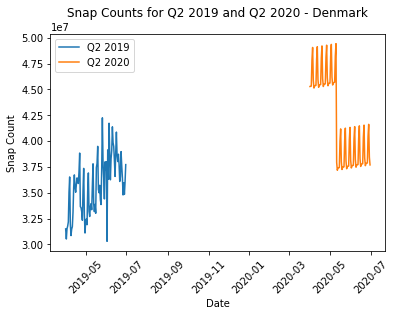

In [80]:
plt.plot(dk_q1['ds'], dk_q1['y'], label='Q2 2019')
plt.plot(dk_q2['ds'], dk_q2['y'], label='Q2 2020')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Snap Count')
plt.title('Snap Counts for Q2 2019 and Q2 2020 - Denmark')
plt.xticks(rotation=45)
plt.show()


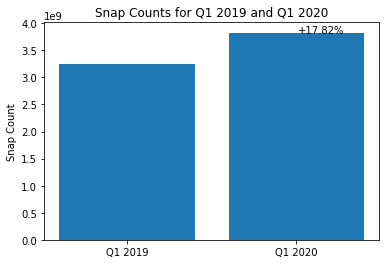

In [70]:
q1_total = dk_q1['y'].sum()
q2_total = dk_q2['y'].sum()

percentage_change_snapcount_dk = ((q2_total - q1_total) / q1_total) * 100

plt.bar(['Q1 2019', 'Q1 2020'], [q1_total, q2_total])
plt.ylabel('Snap Count')
plt.title('Snap Counts for Q1 2019 and Q1 2020')

if percentage_change_snapcount_dk > 0:
    plt.annotate(f'+{percentage_change_snapcount_dk:.2f}%', xy=(1.01, q2_total), ha='left')
elif percentage_change_snapcount_dk < 0:
    plt.annotate(f'{percentage_change_snapcount_dk:.2f}%', xy=(1.01, q2_total), ha='left')
else:
    plt.annotate('No Change', xy=(1.01, q2_total), ha='left')

plt.show()


**Sweden**

In [ ]:
se_df = df[df['country'] == 'SE']
se_byday = se_df.groupby(se_df['event_date'].dt.date).agg({'APP_APPLICATION_OPEN_UU': 'sum'}).reset_index()
se_byday = se_byday.rename(columns={'APP_APPLICATION_OPEN_UU': 'y', 'event_date': 'ds'})

m = Prophet()
m.fit(se_byday)
future = m.make_future_dataframe(periods=10)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_dates = m.make_future_dataframe(periods=10)
se_forecast = m.predict(future_dates)
se_q1_pred = se_forecast[se_forecast["ds"] >= datetime.datetime.combine(datetime.date(2020, 3, 22), datetime.datetime.min.time())]
se_q1_pred = se_q1_pred.loc[:, ['ds', 'yhat']]
se_q1_pred = se_q1_pred.rename(columns={'yhat': 'y'})
se_byday_wpred = pd.concat([se_byday, se_q1_pred], ignore_index=True)

##
m = Prophet()
m.fit(se_byday_wpred)
future = m.make_future_dataframe(periods=91)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_dates = m.make_future_dataframe(periods=91)
se_forecast = m.predict(future_dates)
#no_average = no_forecast['yhat'].mean()
se_q2_pred = se_forecast[se_forecast["ds"] >= datetime.datetime.combine(datetime.date(2020, 4, 1), datetime.datetime.min.time())]
se_q2_pred = se_q2_pred.loc[:, ['ds', 'yhat']]
se_q2_pred = se_q2_pred.rename(columns={'yhat': 'y'})
se_byday_w2pred = pd.concat([se_byday_wpred, se_q2_pred], ignore_index=True)

In [71]:
se_q1 = se_byday_w2pred[(se_byday_w2pred['ds'] >= datetime.date(2019, 4, 1)) & (se_byday_w2pred['ds'] < datetime.date(2019, 7, 1))]
se_q2 = se_byday_w2pred[se_byday_w2pred["ds"] >= datetime.date(2020, 4, 1)]

/usr/local/lib/python3.9/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


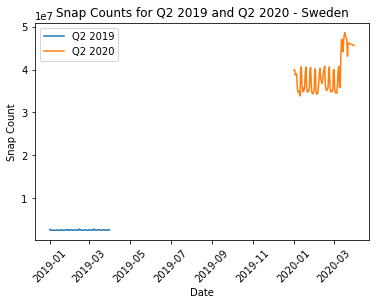

In [59]:
plt.plot(se_q1['ds'], se_q1['y'], label='Q2 2019')
plt.plot(se_q2['ds'], se_q2['y'], label='Q2 2020')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Snap Count')
plt.title('Snap Counts for Q2 2019 and Q2 2020 - Sweden')
plt.xticks(rotation=45)
plt.show()


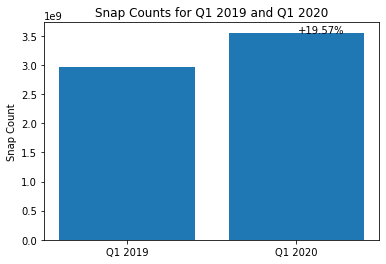

In [57]:
q1_total = se_q1['y'].sum()
q2_total = se_q2['y'].sum()

percentage_change = ((q2_total - q1_total) / q1_total) * 100

plt.bar(['Q1 2019', 'Q1 2020'], [q1_total, q2_total])
plt.ylabel('Snap Count')
plt.title('Snap Counts for Q1 2019 and Q1 2020')

if percentage_change > 0:
    plt.annotate(f'+{percentage_change:.2f}%', xy=(1.01, q2_total), ha='left')
elif percentage_change < 0:
    plt.annotate(f'{percentage_change:.2f}%', xy=(1.01, q2_total), ha='left')
else:
    plt.annotate('No Change', xy=(1.01, q2_total), ha='left')

plt.show()

**Norway**

In [ ]:
no_df = df[df['country'] == 'NO']
no_byday = no_df.groupby(no_df['event_date'].dt.date).agg({'APP_APPLICATION_OPEN_UU': 'sum'}).reset_index()
no_byday = no_byday.rename(columns={'APP_APPLICATION_OPEN_UU': 'y', 'event_date': 'ds'})
no_covid = no_byday[no_byday["ds"] >= datetime.date(2020, 3, 12)]
m = Prophet()
m.fit(no_covid)
future = m.make_future_dataframe(periods=10)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_dates = m.make_future_dataframe(periods=10)
no_forecast = m.predict(future_dates)
no_q1_pred = no_forecast[no_forecast["ds"] >= datetime.datetime.combine(datetime.date(2020, 3, 22), datetime.datetime.min.time())]
no_q1_pred = no_q1_pred.loc[:, ['ds', 'yhat']]
no_q1_pred = no_q1_pred.rename(columns={'yhat': 'y'})
no_byday_wpred = pd.concat([no_byday, no_q1_pred], ignore_index=True)

###

m = Prophet(holidays = NO_COVID_lockdown)
m.fit(no_byday_wpred)
future = m.make_future_dataframe(periods=91)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_dates = m.make_future_dataframe(periods=91)
no_forecast = m.predict(future_dates)
#no_average = no_forecast['yhat'].mean()
no_q2_pred = no_forecast[no_forecast["ds"] >= datetime.datetime.combine(datetime.date(2020, 4, 1), datetime.datetime.min.time())]
no_q2_pred = no_q2_pred.loc[:, ['ds', 'yhat']]
no_q2_pred = no_q2_pred.rename(columns={'yhat': 'y'})
no_byday_w2pred = pd.concat([no_byday_wpred, no_q2_pred], ignore_index=True)

In [82]:
no_q1 = no_byday_w2pred[(no_byday_w2pred['ds'] >= datetime.date(2019, 4, 1)) & (no_byday_w2pred['ds'] < datetime.date(2019, 7, 1))]
no_q2 = no_byday_w2pred[no_byday_w2pred["ds"] >= datetime.date(2020, 4, 1)]

/usr/local/lib/python3.9/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


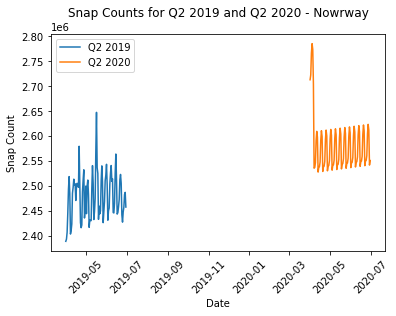

In [83]:
plt.plot(no_q1['ds'], no_q1['y'], label='Q2 2019')
plt.plot(no_q2['ds'], no_q2['y'], label='Q2 2020')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Snap Count')
plt.title('Snap Counts for Q2 2019 and Q2 2020 - Nowrway')
plt.xticks(rotation=45)
plt.show()


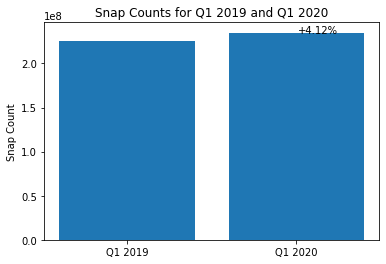

In [74]:
q1_total = no_q1['y'].sum()
q2_total = no_q2['y'].sum()

percentage_change = ((q2_total - q1_total) / q1_total) * 100

plt.bar(['Q1 2019', 'Q1 2020'], [q1_total, q2_total])
plt.ylabel('Snap Count')
plt.title('Snap Counts for Q1 2019 and Q1 2020')

if percentage_change > 0:
    plt.annotate(f'+{percentage_change:.2f}%', xy=(1.01, q2_total), ha='left')
elif percentage_change < 0:
    plt.annotate(f'{percentage_change:.2f}%', xy=(1.01, q2_total), ha='left')
else:
    plt.annotate('No Change', xy=(1.01, q2_total), ha='left')

plt.show()

## **Stories Posted**

## **Stories Posted**

**Denmark**

In [ ]:
dk_df = df[df['country'] == 'DK']
dk_byday = dk_df.groupby(dk_df['event_date'].dt.date).agg({'STORY_SNAP_POST_COUNT': 'sum'}).reset_index()
dk_byday = dk_byday.rename(columns={'STORY_SNAP_POST_COUNT': 'y', 'event_date': 'ds'})
dk_covid = dk_byday[dk_byday["ds"] >= datetime.date(2020, 3, 13)]
m = Prophet()
m.fit(dk_covid)
future = m.make_future_dataframe(periods=10)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_dates = m.make_future_dataframe(periods=10)
dk_forecast = m.predict(future_dates)
dk_q1_pred = dk_forecast[dk_forecast["ds"] >= datetime.datetime.combine(datetime.date(2020, 3, 22), datetime.datetime.min.time())]
dk_q1_pred = dk_q1_pred.loc[:, ['ds', 'yhat']]
dk_q1_pred = dk_q1_pred.rename(columns={'yhat': 'y'})
dk_byday_wpred = pd.concat([dk_byday, dk_q1_pred], ignore_index=True)

####
m = Prophet(holidays = DE_COVID_lockdown)
m.fit(dk_byday_wpred)
future = m.make_future_dataframe(periods=91)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_dates = m.make_future_dataframe(periods=91)
dk_forecast = m.predict(future_dates)
#no_average = no_forecast['yhat'].mean()
dk_q2_pred = dk_forecast[dk_forecast["ds"] >= datetime.datetime.combine(datetime.date(2020, 4, 1), datetime.datetime.min.time())]
dk_q2_pred = dk_q2_pred.loc[:, ['ds', 'yhat']]
dk_q2_pred = dk_q2_pred.rename(columns={'yhat': 'y'})
dk_byday_w2pred = pd.concat([dk_byday_wpred, dk_q2_pred], ignore_index=True)

In [ ]:
dk_q1 = dk_byday_w2pred[(dk_byday_w2pred['ds'] >= datetime.date(2019, 4, 1)) & (dk_byday_w2pred['ds'] < datetime.date(2019, 7, 1))]
dk_q2 = dk_byday_w2pred[dk_byday_w2pred["ds"] >= datetime.date(2020, 4, 1)]

/usr/local/lib/python3.9/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


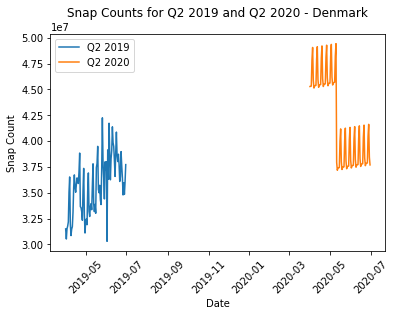

In [ ]:
plt.plot(dk_q1['ds'], dk_q1['y'], label='Q2 2019')
plt.plot(dk_q2['ds'], dk_q2['y'], label='Q2 2020')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Story Post Count')
plt.title('Story Post Count for Q2 2019 and Q2 2020 - Denmark')
plt.xticks(rotation=45)
plt.show()


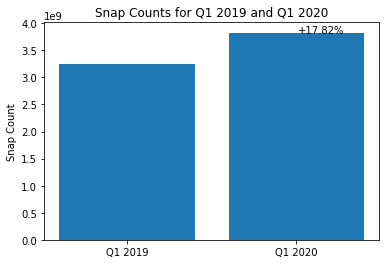

In [ ]:
q1_total = dk_q1['y'].sum()
q2_total = dk_q2['y'].sum()

percentage_change_snapcount_dk = ((q2_total - q1_total) / q1_total) * 100

plt.bar(['Q1 2019', 'Q1 2020'], [q1_total, q2_total])
plt.ylabel('Story Post Count')
plt.title('Story Post Count for Q2 2019 and Q2 2020')

if percentage_change_snapcount_dk > 0:
    plt.annotate(f'+{percentage_change_snapcount_dk:.2f}%', xy=(1.01, q2_total), ha='left')
elif percentage_change_snapcount_dk < 0:
    plt.annotate(f'{percentage_change_snapcount_dk:.2f}%', xy=(1.01, q2_total), ha='left')
else:
    plt.annotate('No Change', xy=(1.01, q2_total), ha='left')

plt.show()


**Sweden**

In [ ]:
se_df = df[df['country'] == 'SE']
se_byday = se_df.groupby(se_df['event_date'].dt.date).agg({'STORY_SNAP_POST_COUNT': 'sum'}).reset_index()
se_byday = se_byday.rename(columns={'STORY_SNAP_POST_COUNT': 'y', 'event_date': 'ds'})

m = Prophet()
m.fit(se_byday)
future = m.make_future_dataframe(periods=10)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_dates = m.make_future_dataframe(periods=10)
se_forecast = m.predict(future_dates)
se_q1_pred = se_forecast[se_forecast["ds"] >= datetime.datetime.combine(datetime.date(2020, 3, 22), datetime.datetime.min.time())]
se_q1_pred = se_q1_pred.loc[:, ['ds', 'yhat']]
se_q1_pred = se_q1_pred.rename(columns={'yhat': 'y'})
se_byday_wpred = pd.concat([se_byday, se_q1_pred], ignore_index=True)

##
m = Prophet()
m.fit(se_byday_wpred)
future = m.make_future_dataframe(periods=91)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_dates = m.make_future_dataframe(periods=91)
se_forecast = m.predict(future_dates)
#no_average = no_forecast['yhat'].mean()
se_q2_pred = se_forecast[se_forecast["ds"] >= datetime.datetime.combine(datetime.date(2020, 4, 1), datetime.datetime.min.time())]
se_q2_pred = se_q2_pred.loc[:, ['ds', 'yhat']]
se_q2_pred = se_q2_pred.rename(columns={'yhat': 'y'})
se_byday_w2pred = pd.concat([se_byday_wpred, se_q2_pred], ignore_index=True)

In [ ]:
se_q1 = se_byday_w2pred[(se_byday_w2pred['ds'] >= datetime.date(2019, 4, 1)) & (se_byday_w2pred['ds'] < datetime.date(2019, 7, 1))]
se_q2 = se_byday_w2pred[se_byday_w2pred["ds"] >= datetime.date(2020, 4, 1)]

/usr/local/lib/python3.9/dist-packages/pandas/core/ops/array_ops.py:73: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  result = libops.scalar_compare(x.ravel(), y, op)


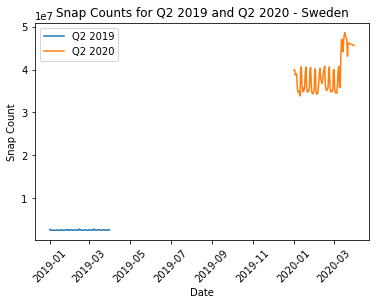

In [ ]:
plt.plot(se_q1['ds'], se_q1['y'], label='Q2 2019')
plt.plot(se_q2['ds'], se_q2['y'], label='Q2 2020')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Story Post Count')
plt.title('Story Post Count for Q2 2019 and Q2 2020 - Sweden')
plt.xticks(rotation=45)
plt.show()


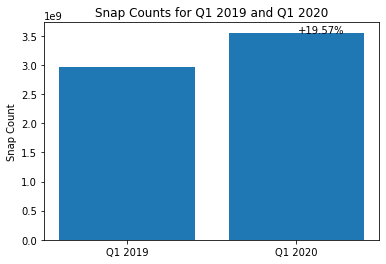

In [ ]:
q1_total = se_q1['y'].sum()
q2_total = se_q2['y'].sum()

percentage_change = ((q2_total - q1_total) / q1_total) * 100

plt.bar(['Q2 2019', 'Q2 2020'], [q1_total, q2_total])
plt.ylabel('Story Post Count')
plt.title('Story Post Count for Q1 2019 and Q1 2020')

if percentage_change > 0:
    plt.annotate(f'+{percentage_change:.2f}%', xy=(1.01, q2_total), ha='left')
elif percentage_change < 0:
    plt.annotate(f'{percentage_change:.2f}%', xy=(1.01, q2_total), ha='left')
else:
    plt.annotate('No Change', xy=(1.01, q2_total), ha='left')

plt.show()

**Norway**

In [87]:
no_df = df[df['country'] == 'NO']
no_byday = no_df.groupby(no_df['event_date'].dt.date).agg({'STORY_SNAP_POST_COUNT': 'sum'}).reset_index()
no_byday = no_byday.rename(columns={'STORY_SNAP_POST_COUNT': 'y', 'event_date': 'ds'})
no_covid = no_byday[no_byday["ds"] >= datetime.date(2020, 3, 12)]
m = Prophet()
m.fit(no_covid)
future = m.make_future_dataframe(periods=10)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_dates = m.make_future_dataframe(periods=10)
no_forecast = m.predict(future_dates)
no_q1_pred = no_forecast[no_forecast["ds"] >= datetime.datetime.combine(datetime.date(2020, 3, 22), datetime.datetime.min.time())]
no_q1_pred = no_q1_pred.loc[:, ['ds', 'yhat']]
no_q1_pred = no_q1_pred.rename(columns={'yhat': 'y'})
no_byday_wpred = pd.concat([no_byday, no_q1_pred], ignore_index=True)

###

m = Prophet(holidays = NO_COVID_lockdown)
m.fit(no_byday_wpred)
future = m.make_future_dataframe(periods=91)
future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
future_dates = m.make_future_dataframe(periods=91)
no_forecast = m.predict(future_dates)
#no_average = no_forecast['yhat'].mean()
no_q2_pred = no_forecast[no_forecast["ds"] >= datetime.datetime.combine(datetime.date(2020, 4, 1), datetime.datetime.min.time())]
no_q2_pred = no_q2_pred.loc[:, ['ds', 'yhat']]
no_q2_pred = no_q2_pred.rename(columns={'yhat': 'y'})
no_byday_w2pred = pd.concat([no_byday_wpred, no_q2_pred], ignore_index=True)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 7.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgm38mns/fpc4bavi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbgm38mns/3j7l9cx0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11829', 'data', 'file=/tmp/tmpbgm38mns/fpc4bavi.json', 'init=/tmp/tmpbgm38mns/3j7l9cx0.json', 'output', 'file=/tmp/tmpbgm38mns/prophet_model0o6s_iwf/prophet_model-20230316184435.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
18:44:35 - cmdstanpy - INFO - Chain [1] start processing
INF

In [86]:
no_q1 = no_byday_w2pred[(no_byday_w2pred['ds'] >= datetime.date(2019, 4, 1)) & (no_byday_w2pred['ds'] < datetime.date(2019, 7, 1))]
no_q2 = no_byday_w2pred[no_byday_w2pred["ds"] >= datetime.date(2020, 4, 1)]

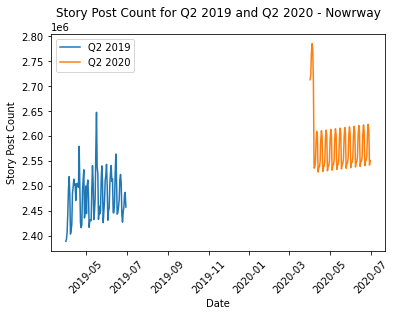

In [85]:
plt.plot(no_q1['ds'], no_q1['y'], label='Q2 2019')
plt.plot(no_q2['ds'], no_q2['y'], label='Q2 2020')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Story Post Count')
plt.title('Story Post Count for Q2 2019 and Q2 2020 - Nowrway')
plt.xticks(rotation=45)
plt.show()


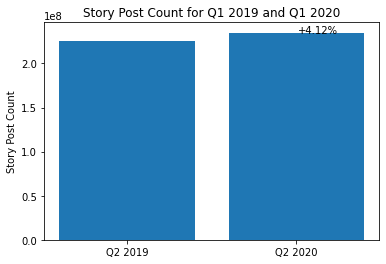

In [84]:
q1_total = no_q1['y'].sum()
q2_total = no_q2['y'].sum()

percentage_change = ((q2_total - q1_total) / q1_total) * 100

plt.bar(['Q2 2019', 'Q2 2020'], [q1_total, q2_total])
plt.ylabel('Story Post Count')
plt.title('Story Post Count for Q1 2019 and Q1 2020')

if percentage_change > 0:
    plt.annotate(f'+{percentage_change:.2f}%', xy=(1.01, q2_total), ha='left')
elif percentage_change < 0:
    plt.annotate(f'{percentage_change:.2f}%', xy=(1.01, q2_total), ha='left')
else:
    plt.annotate('No Change', xy=(1.01, q2_total), ha='left')

plt.show()